In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("Datasets/fraudDataset.csv")
df.head()

,Transaction ID,Branch,Amount,Sender,Sender Old Balance,Sender New Balance,Receiver,Receiver Old Balance,Receiver New Balance,Transaction Count,Account Age,Last Transaction,Time of Transaction,isFraud
0,TRX9685747309,Fort Worth,6382.19,C1568949719,29458.84,23076.65,C1650299186,40246.02,46628.21,109,5.75,2.97,20:20:05,0
1,TRX5374085471,Austin,6064.70,C1406004470,70695.74,64631.04,C1868724762,51617.04,57681.74,6,7.75,1.10,07:38:27,0
2,TRX2764342505,Fort Worth,112501.19,C1807397140,128395.37,15894.18,C715093362,95301.35,207802.54,18,5.51,4.98,18:47:37,0
3,TRX7460262741,Nashville,2496.08,C919962315,55283.12,52787.04,C1875395688,89095.63,91591.71,7,5.35,1.50,00:29:40,0
4,TRX2331341351,San Francisco,12827.97,C88893820,91124.57,78296.60,C1266224518,44983.23,57811.20,12,7.09,2.61,17:05:16,0


In [3]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 10002
Number of columns: 14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction ID        10002 non-null  object 
 1   Branch                10002 non-null  object 
 2   Amount                10002 non-null  float64
 3   Sender                10002 non-null  object 
 4   Sender Old Balance    10002 non-null  float64
 5   Sender New Balance    10002 non-null  float64
 6   Receiver              10002 non-null  object 
 7   Receiver Old Balance  10002 non-null  float64
 8   Receiver New Balance  10002 non-null  float64
 9   Transaction Count     10002 non-null  int64  
 10  Account Age           10002 non-null  float64
 11  Last Transaction      10002 non-null  float64
 12  Time of Transaction   10002 non-null  object 
 13  isFraud               10002 non-null  int64  
dtypes: float64(7), int64(2), object(5)
memory usage: 1.1+ MB


In [5]:
df.drop(columns=["Transaction ID"], inplace=True)

In [6]:
pd.set_option("display.float_format", "{:.2f}".format)

In [7]:
df.describe()

,Amount,Sender Old Balance,Sender New Balance,Receiver Old Balance,Receiver New Balance,Transaction Count,Account Age,Last Transaction,isFraud
count,10002.00,10002.00,10002.00,10002.00,10002.00,10002.00,10002.00,10002.00,10002.00
mean,52838.81,96974.27,62883.15,49524.67,86509.15,57.05,6.33,2.89,0.20
std,85656.12,161162.01,135782.99,28780.83,62093.75,32.41,2.44,2.05,0.40
min,2.39,75.32,3.74,10.08,75.32,1.00,1.01,0.00,0.00
25%,4592.14,30917.61,12539.31,24368.77,40459.42,29.00,4.41,1.30,0.00
50%,13954.92,63997.17,33311.47,49168.92,73886.47,57.00,6.47,2.45,0.00
75%,87521.96,95060.11,66031.98,74562.87,111187.99,86.00,8.32,4.11,0.00
max,2222097.28,1408307.08,1297391.64,99969.91,902760.41,112.00,12.93,9.96,1.00


In [8]:
df.describe(include="object")

,Branch,Sender,Receiver,Time of Transaction
count,10002,10002,10002,10002
unique,23,8085,9987,9435
top,Philadelphia,C913724364,C2111381500,15:08:40
freq,769,6,2,3


# Removing duplicates

In [9]:
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", df.shape[0])

Number of rows after removing duplicates: 9987


# Null values

In [10]:
print("Null values in each column:")
df.isna().sum()

Null values in each column:


Branch                  0
Amount                  0
Sender                  0
Sender Old Balance      0
Sender New Balance      0
Receiver                0
Receiver Old Balance    0
Receiver New Balance    0
Transaction Count       0
Account Age             0
Last Transaction        0
Time of Transaction     0
isFraud                 0
dtype: int64

# Unique values

In [11]:
print("Number of unique values in each column:")
df.nunique()

Number of unique values in each column:


Branch                    23
Amount                  9277
Sender                  8085
Sender Old Balance      9982
Sender New Balance      9982
Receiver                9987
Receiver Old Balance    9984
Receiver New Balance    9985
Transaction Count        112
Account Age             1068
Last Transaction         908
Time of Transaction     9435
isFraud                    2
dtype: int64

# Data Visualizations

In [12]:
fraud_count = df["isFraud"].value_counts()
fraud_count

0    7989
1    1998
Name: isFraud, dtype: int64

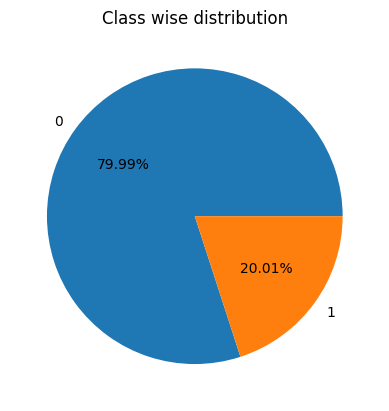

In [13]:
plt.pie(fraud_count, labels=fraud_count.keys(), autopct="%.2f%%")
plt.title("Class wise distribution")
plt.show()

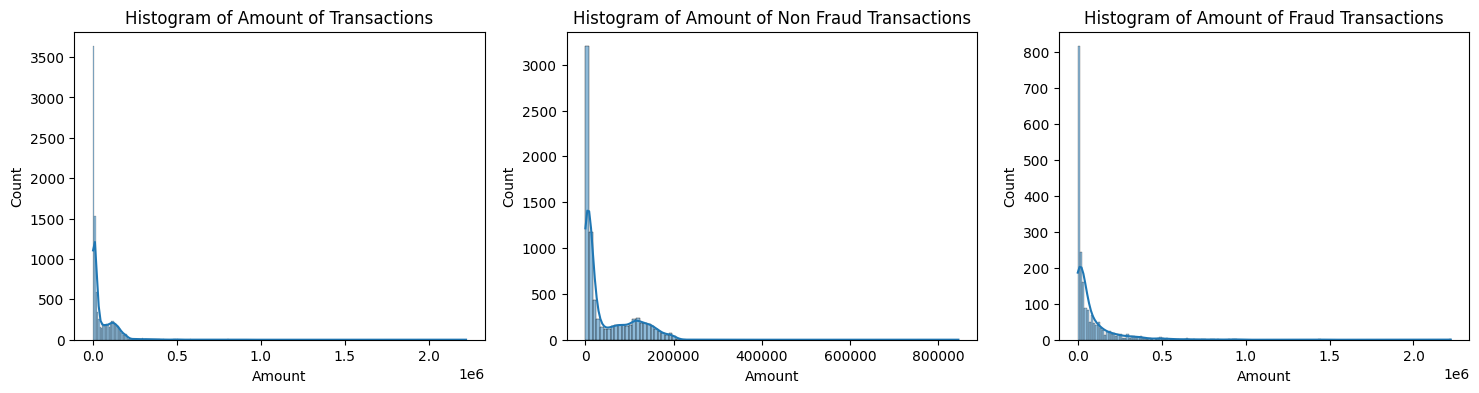

In [14]:
f, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 4))

ax = sns.histplot(data=df,x='Amount',kde=True, ax=axes[0])
axes[0].set_title('Histogram of Amount of Transactions')

ax = sns.histplot(data=df[df['isFraud'] == 0],x='Amount',kde=True, ax=axes[1])
axes[1].set_title('Histogram of Amount of Non Fraud Transactions')

ax = sns.histplot(data=df[df['isFraud'] == 1],x='Amount',kde=True, ax=axes[2])
axes[2].set_title('Histogram of Amount of Fraud Transactions')

plt.show()

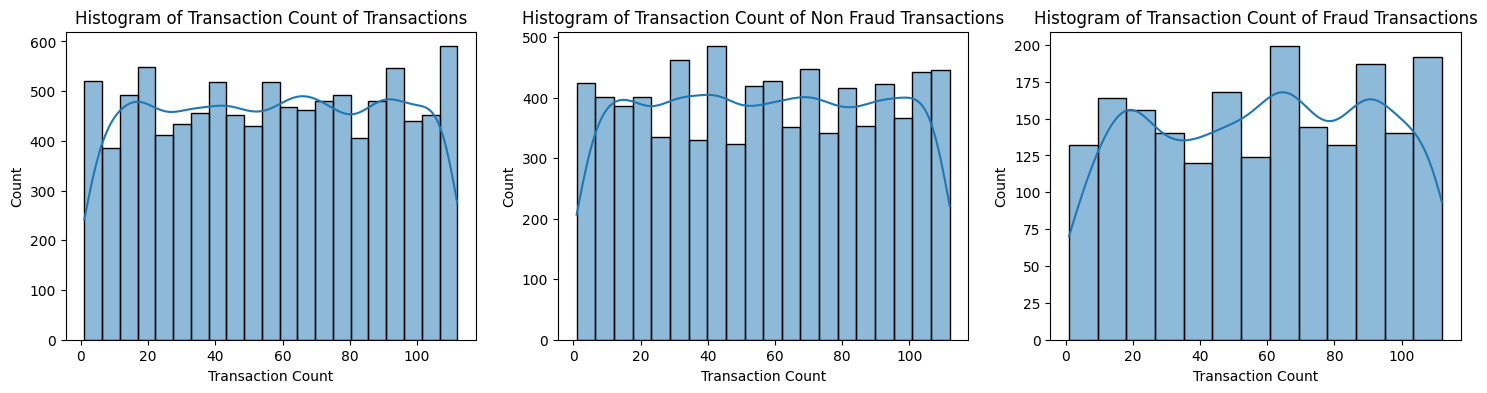

In [15]:
f, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 4))

ax = sns.histplot(data=df,x='Transaction Count',kde=True, ax=axes[0])
axes[0].set_title('Histogram of Transaction Count of Transactions')

ax = sns.histplot(data=df[df['isFraud'] == 0],x='Transaction Count',kde=True, ax=axes[1])
axes[1].set_title('Histogram of Transaction Count of Non Fraud Transactions')

ax = sns.histplot(data=df[df['isFraud'] == 1],x='Transaction Count',kde=True, ax=axes[2])
axes[2].set_title('Histogram of Transaction Count of Fraud Transactions')

plt.show()

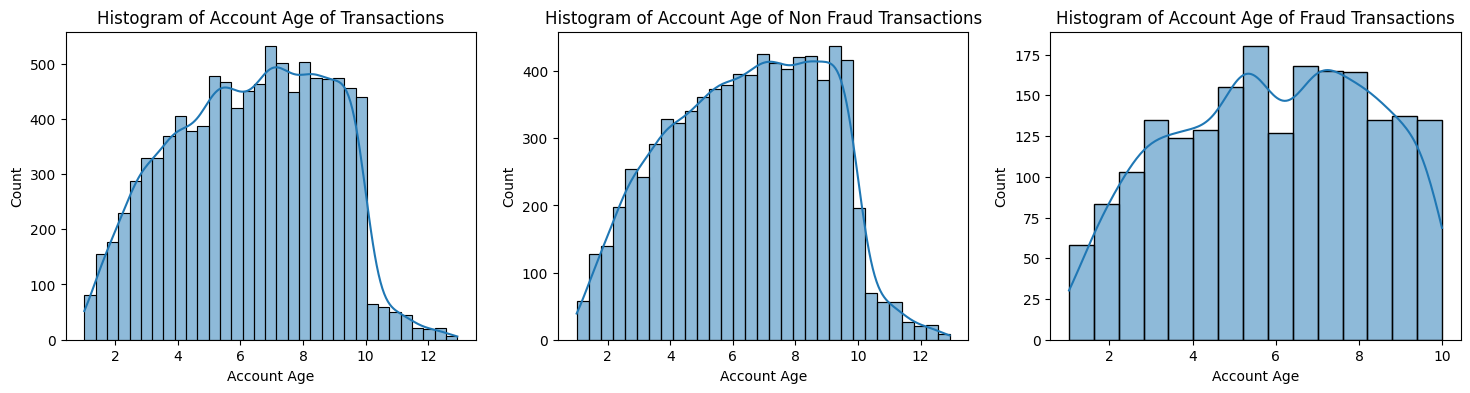

In [16]:
f, axes = plt.subplots(ncols=3, nrows=1, figsize=(18, 4))

ax = sns.histplot(data=df,x='Account Age',kde=True, ax=axes[0])
axes[0].set_title('Histogram of Account Age of Transactions')

ax = sns.histplot(data=df[df['isFraud'] == 0],x='Account Age',kde=True, ax=axes[1])
axes[1].set_title('Histogram of Account Age of Non Fraud Transactions')

ax = sns.histplot(data=df[df['isFraud'] == 1],x='Account Age',kde=True, ax=axes[2])
axes[2].set_title('Histogram of Account Age of Fraud Transactions')

plt.show()

In [17]:
df['Hour'] = df['Time of Transaction'].str[:2]
df['Hour'] = df['Hour'].astype(int)

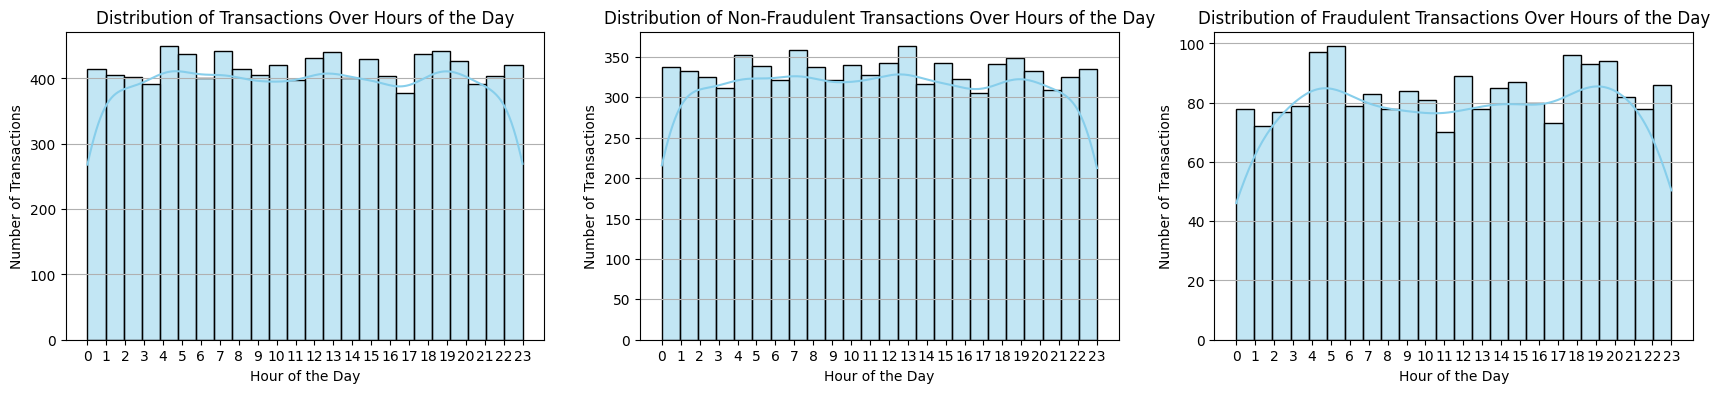

In [18]:
f, axes = plt.subplots(ncols=3, nrows=1, figsize=(21, 4))

sns.histplot(df['Hour'], bins=24, color='skyblue', edgecolor='black', kde=True, ax=axes[0])
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Transactions')
axes[0].set_title('Distribution of Transactions Over Hours of the Day')
axes[0].set_xticks(range(24))
axes[0].grid(axis='y')

sns.histplot(df[df['isFraud'] == 0]['Hour'], bins=24, color='skyblue', edgecolor='black', kde=True, ax=axes[1])
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Number of Transactions')
axes[1].set_title('Distribution of Non-Fraudulent Transactions Over Hours of the Day')
axes[1].set_xticks(range(24))
axes[1].grid(axis='y')

sns.histplot(df[df['isFraud'] == 1]['Hour'], bins=24, color='skyblue', edgecolor='black', kde=True, ax=axes[2])
axes[2].set_xlabel('Hour of the Day')
axes[2].set_ylabel('Number of Transactions')
axes[2].set_title('Distribution of Fraudulent Transactions Over Hours of the Day')
axes[2].set_xticks(range(24))
axes[2].grid(axis='y')

plt.show()

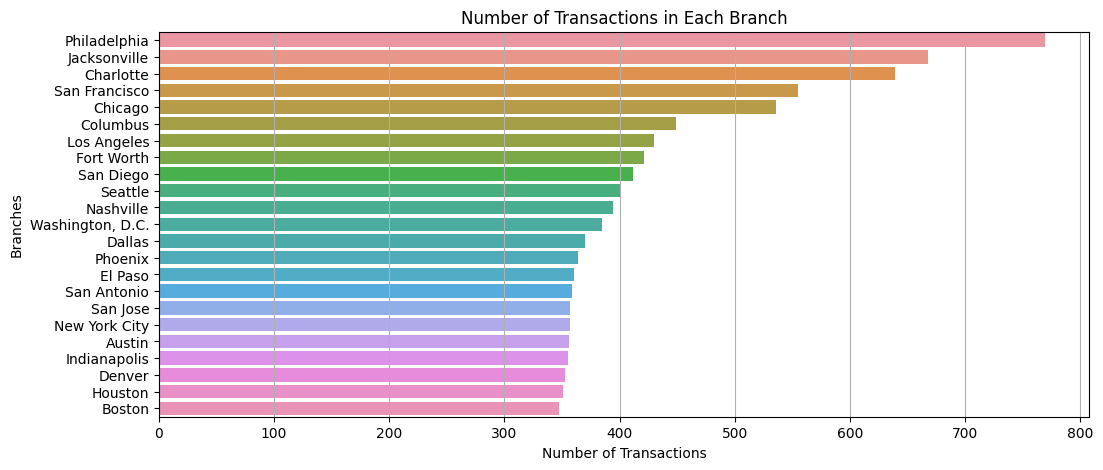

In [19]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, y='Branch', orient='horizontal', order=df['Branch'].value_counts().index)
plt.xlabel('Number of Transactions')
plt.ylabel('Branches')
plt.title('Number of Transactions in Each Branch')
plt.grid(axis='x')

plt.show()

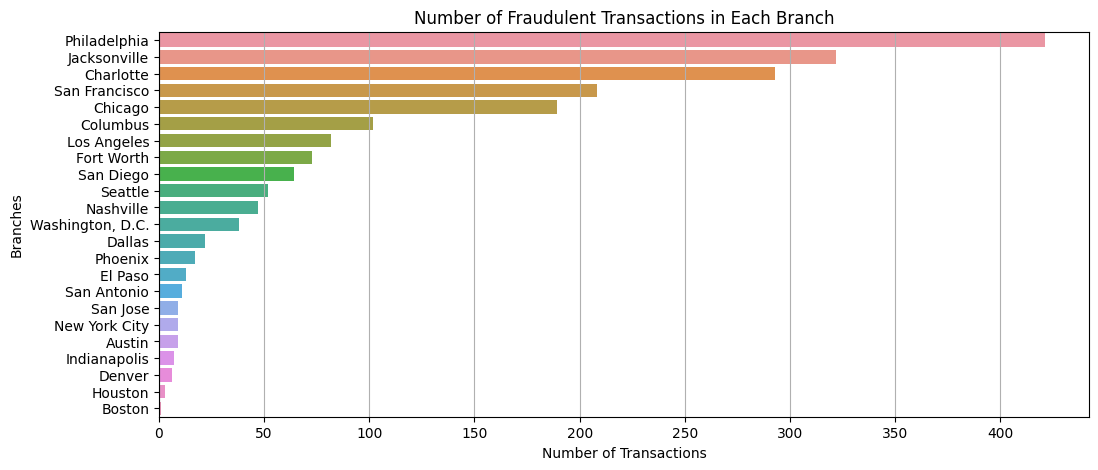

In [20]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df[df["isFraud"] == 1], y='Branch', orient='horizontal', order=df['Branch'].value_counts().index)
plt.xlabel('Number of Transactions')
plt.ylabel('Branches')
plt.title('Number of Fraudulent Transactions in Each Branch')
plt.grid(axis='x')

plt.show()

In [21]:
df.drop(columns=["Hour"], inplace=True)

In [22]:
df.to_csv("Datasets/cleaned_data.csv", index=False)